# Linear Regression with GDA + hypertuning of LR and Epoch + end result

In [335]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Loading - Central Cee

In [336]:
# Load the dataset fro csv dataset.csv

import pandas as pd
data = pd.read_csv('dataset.csv')
print(data.head(10))

# Extract the X and y values from the dataset
X = data['X'].values
y = data['y'].values

X = X.reshape(-1, 1)

print("X shape:", X.shape)
print("y shape:", y.shape)

    X   y
0   1   2
1   2   4
2   3   6
3   4   8
4   5  10
5   6  12
6   7  14
7   8  15
8   9  16
9  10  20
X shape: (10, 1)
y shape: (10,)


## Part 2: Split -James McAvoy

In [337]:
def split_dataset(X, y, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
    
    n_samples = len(X)
    n_train = int(n_samples * train_ratio)
    n_val = int(n_samples * val_ratio)
    
    indices = np.random.permutation(n_samples)
    
    train_indices = indices[:n_train]
    val_indices = indices[n_train:n_train+n_val]
    test_indices = indices[n_train+n_val:]
    
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(X, y)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Training set size: 6
Validation set size: 2
Test set size: 2


## Part 3: Descent - Warner Bros

In [338]:
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(2)
    
    for _ in range(iterations):
        h = theta[0] + theta[1] * X.flatten()
        gradient = np.array([
            np.sum(h - y) / m,
            np.sum((h - y) * X.flatten()) / m
        ])
        theta -= learning_rate * gradient
    
    return theta

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## Part 4: Hyperparameter tuning, learning rates

In [339]:
learning_rates = [x/4000 for x in range(1,40)]
best_lr = None
best_val_mse = float('inf')
best_theta = None

for lr in learning_rates:
    theta = gradient_descent(X_val, y_val, learning_rate=lr)
    y_val_pred = theta[0] + theta[1] * X_val.flatten()
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    print(f"Learning rate: {lr}, Validation MSE: {val_mse}")
    
    if val_mse < best_val_mse:
        best_val_mse = val_mse
        best_lr = lr
        best_theta = theta

print(f"\nBest learning rate: {best_lr}")
print(f"Best validation MSE: {best_val_mse}")https://accounts.google.com/AccountChooser?continue=https%3A%2F%2Fclassroom.google.com%2F%3Fpli%3D1&ddm=0

Learning rate: 0.00025, Validation MSE: 0.20106614281625823
Learning rate: 0.0005, Validation MSE: 0.20062948351947046
Learning rate: 0.00075, Validation MSE: 0.2001937721067773
Learning rate: 0.001, Validation MSE: 0.19975900646594086
Learning rate: 0.00125, Validation MSE: 0.1993251845450566
Learning rate: 0.0015, Validation MSE: 0.19889230429666999
Learning rate: 0.00175, Validation MSE: 0.19846036367776676
Learning rate: 0.002, Validation MSE: 0.19802936064976345
Learning rate: 0.00225, Validation MSE: 0.19759929317849406
Learning rate: 0.0025, Validation MSE: 0.19717015923420966
Learning rate: 0.00275, Validation MSE: 0.19674195679155643
Learning rate: 0.003, Validation MSE: 0.19631468382957634
Learning rate: 0.00325, Validation MSE: 0.19588833833169222
Learning rate: 0.0035, Validation MSE: 0.19546291828570017
Learning rate: 0.00375, Validation MSE: 0.19503842168375993
Learning rate: 0.004, Validation MSE: 0.1946148465223861
Learning rate: 0.00425, Validation MSE: 0.1941921908024

## Part 4:  Hyperparameter tuning - epochs

In [340]:
epochs = [(x*50+50) for x in range(30)]
best_epoch= None
best_val_mse = float('inf')
best_theta = None

for epoch in epochs:
    theta = gradient_descent(X_val, y_val, learning_rate=best_lr, iterations=epoch)
    y_val_pred = theta[0] + theta[1] * X_val.flatten()
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    print(f"Epoch: {epoch}, Validation MSE: {val_mse}")
    
    if val_mse < best_val_mse:
        best_val_mse = val_mse
        best_epoch = epoch
        best_theta = theta

print(f"\nBest epoch: {best_epoch}")
print(f"Best validation MSE: {best_val_mse}")

Epoch: 50, Validation MSE: 0.20065127682307599
Epoch: 100, Validation MSE: 0.1998024082084585
Epoch: 150, Validation MSE: 0.19895713078915409
Epoch: 200, Validation MSE: 0.19811542937237214
Epoch: 250, Validation MSE: 0.1972772888295935
Epoch: 300, Validation MSE: 0.19644269409630408
Epoch: 350, Validation MSE: 0.19561163017172087
Epoch: 400, Validation MSE: 0.19478408211852116
Epoch: 450, Validation MSE: 0.19396003506257675
Epoch: 500, Validation MSE: 0.19313947419268584
Epoch: 550, Validation MSE: 0.19232238476030528


Epoch: 600, Validation MSE: 0.19150875207928636
Epoch: 650, Validation MSE: 0.19069856152561243
Epoch: 700, Validation MSE: 0.18989179853713362
Epoch: 750, Validation MSE: 0.1890884486133082
Epoch: 800, Validation MSE: 0.18828849731493594
Epoch: 850, Validation MSE: 0.18749193026390737
Epoch: 900, Validation MSE: 0.18669873314293714
Epoch: 950, Validation MSE: 0.1859088916953115
Epoch: 1000, Validation MSE: 0.18512239172463024
Epoch: 1050, Validation MSE: 0.18433921909455273
Epoch: 1100, Validation MSE: 0.18355935972854237
Epoch: 1150, Validation MSE: 0.18278279960961458
Epoch: 1200, Validation MSE: 0.18200952478008325
Epoch: 1250, Validation MSE: 0.1812395213413141
Epoch: 1300, Validation MSE: 0.18047277545346913
Epoch: 1350, Validation MSE: 0.17970927333526165
Epoch: 1400, Validation MSE: 0.17894900126370933
Epoch: 1450, Validation MSE: 0.17819194557388232
Epoch: 1500, Validation MSE: 0.17743809265866453

Best epoch: 1500
Best validation MSE: 0.17743809265866453


## Part 5: Final Parameters after Hyperparameter Tuning

In [341]:
print("Final parameters (theta):", best_theta)
print(f"The linear regression equation is: y = {best_theta[0]:.4f} + {best_theta[1]:.4f}x")
print(f"best epoch: {best_epoch}")
print(f"best learning rate: {best_lr}")

Final parameters (theta): [0.66746848 1.84066623]
The linear regression equation is: y = 0.6675 + 1.8407x
best epoch: 1500
best learning rate: 0.00975


## Part 6: Test your model on the testing data

Test MSE: 0.43696331667920196


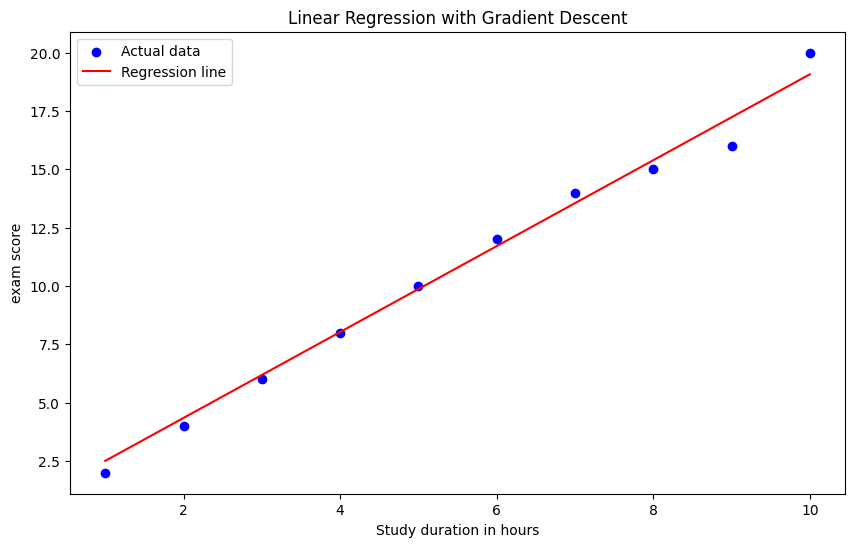

In [342]:

y_test_pred = best_theta[0] + best_theta[1] * X_test.flatten()

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, best_theta[0] + best_theta[1] * X.flatten(), color='red', label='Regression line')
plt.xlabel('Study duration in hours')
plt.ylabel('exam score')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()